In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
X_train = np.array([
    [2.0,4.5],
    [4.5,6.0],
    [1.5,4.0],
    [3.5,5.0],
    [2.5,5.5],
    [4.0,2.5],
])

y_train = np.array([0,1,0,1,1,0]) # 0 for class A and 1 for class B

X_test = np.array([
    [3.0, 4.5],
    [1.5, 6.0],
    [5.0, 2.5], 
    [3.0, 2.5]
])

In [10]:
def euclidean_distance(a,b):
    return np.sqrt(np.sum((a - b)**2, axis=1))

def knn_predict(X_train, y_train, X_test, k = 3):
    y_pred = []
    for test_point in X_test:
        distances = euclidean_distance(X_train,test_point)
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

In [13]:
y_test_pred = knn_predict(X_train, y_train, X_test, k=3)
print ("Predicted labels:", y_test_pred)

Predicted labels: [1 0 1 0]


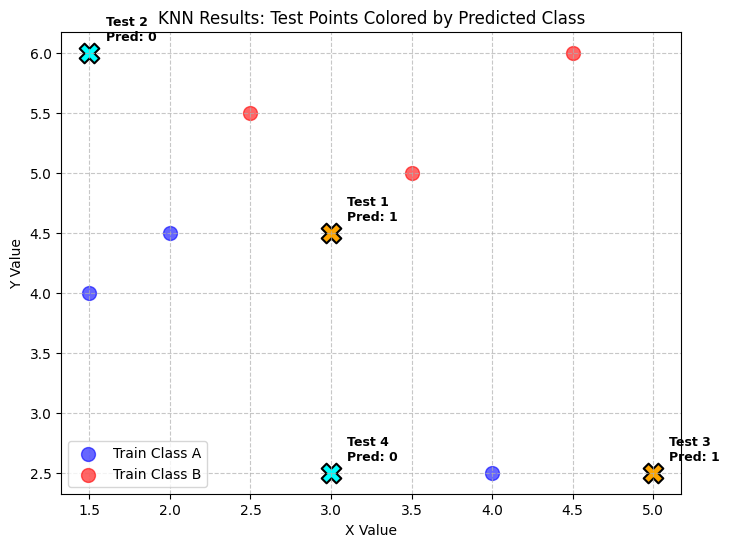

In [15]:
# 3. Plotting
plt.figure(figsize=(8, 6))

# Plot Training Points (Circles)
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], c='blue', label='Train Class A', s=100, alpha=0.6)
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c='red', label='Train Class B', s=100, alpha=0.6)

# Plot Test Points (Large 'X') colored by their predicted class
for i in range(len(X_test)):
    pred_color = 'cyan' if y_test_pred[i] == 0 else 'orange'
    plt.scatter(X_test[i, 0], X_test[i, 1], marker='X', s=200, c=pred_color, edgecolors='black', linewidth=1.5)
    plt.text(X_test[i, 0] + 0.1, X_test[i, 1] + 0.1, f"Test {i+1}\nPred: {y_test_pred[i]}", fontsize=9, fontweight='bold')

plt.title("KNN Results: Test Points Colored by Predicted Class")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()